<a href="https://colab.research.google.com/github/i-r-a/toxic/blob/master/toxicLinearSubset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import os
import io
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn import preprocessing
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import seaborn as sns

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
train = pd.read_csv('drive/My Drive/clean_new_train.csv')

In [9]:
le = preprocessing.LabelEncoder()
cz = le.fit_transform(train.comment_text)

In [10]:
y_columns = "toxic"

In [11]:
y = train[y_columns]
x = cz
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=300)

In [ ]:
x_train,y_train

(array([  2434, 203820,  90921, ..., 160558, 126719,   4174]), 50459     0
 102570    0
 6659      0
 90824     0
 212885    0
          ..
 7146      0
 169681    0
 60310     0
 203244    1
 50385     0
 Name: toxic, Length: 178827, dtype: int64)

In [12]:
x_train = x_train.reshape(-1,1)

In [13]:
LIN = LinearRegression()
LIN.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
x_test = x_test.reshape(-1,1)
y_pred = LIN.predict(x_train)
y_pred2 = LIN.predict(x_test)


In [15]:
print("Train MAE: ")
print(metrics.mean_absolute_error(y_train,y_pred))
print()
print("Test MAE: ")
print(metrics.mean_absolute_error(y_test,y_pred2))
print()
print("Test MSE: ")
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred2)))

Train MAE: 
0.4917563919696707

Test MAE: 
0.49213868790962295

Test MSE: 
0.49621047082015446


In [16]:
pred = []
for elem in y_pred:
  pred.append(int(round(elem)))
print(classification_report(y_train,pred))
print(confusion_matrix(y_train,pred))
fpr,tpr,thresh = roc_curve(y_train,pred)
roc_auc = auc(fpr,tpr)

              precision    recall  f1-score   support

           0       0.57      0.67      0.62     18829
           1       0.55      0.45      0.49     17119

    accuracy                           0.56     35948
   macro avg       0.56      0.56      0.56     35948
weighted avg       0.56      0.56      0.56     35948

[[12643  6186]
 [ 9479  7640]]


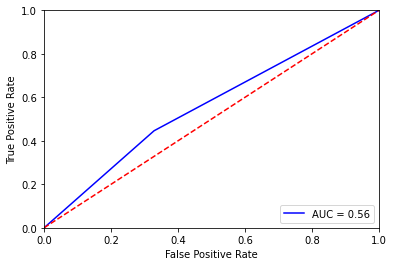

In [17]:
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [18]:
pred = []
for elem in y_pred2:
  pred.append(int(round(elem)))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))
fpr,tpr,thresh = roc_curve(y_test,pred)
roc_auc = auc(fpr,tpr)

              precision    recall  f1-score   support

           0       0.57      0.67      0.62      4723
           1       0.55      0.44      0.49      4265

    accuracy                           0.56      8988
   macro avg       0.56      0.56      0.55      8988
weighted avg       0.56      0.56      0.56      8988

[[3156 1567]
 [2371 1894]]


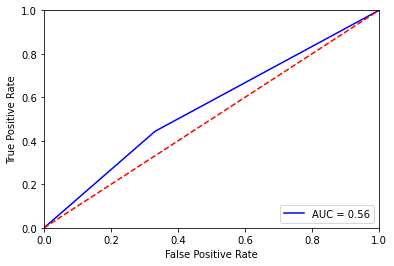

In [19]:
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [20]:
y_columns = "severe_toxic"
y = train[y_columns]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=300)
x_train = x_train.reshape(-1,1)
LIN = LinearRegression()
LIN.fit(x_train, y_train)
x_test = x_test.reshape(-1,1)
y_pred = LIN.predict(x_train)
y_pred2 = LIN.predict(x_test)
print("Train MAE: ")
print(metrics.mean_absolute_error(y_train,y_pred))
print()
print("Test MAE: ")
print(metrics.mean_absolute_error(y_test,y_pred2))
print()
print("Test MSE: ")
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred2)))

Train MAE: 
0.08383379207471808

Test MAE: 
0.08287033385424307

Test MSE: 
0.20238918905462858


In [21]:
pred = []
for elem in y_pred:
  pred.append(int(round(elem)))
print(classification_report(y_train,pred))
print(confusion_matrix(y_train,pred))
fpr,tpr,thresh = roc_curve(y_train,pred)
roc_auc = auc(fpr,tpr)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     34371
           1       0.00      0.00      0.00      1577

    accuracy                           0.96     35948
   macro avg       0.48      0.50      0.49     35948
weighted avg       0.91      0.96      0.93     35948

[[34371     0]
 [ 1577     0]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


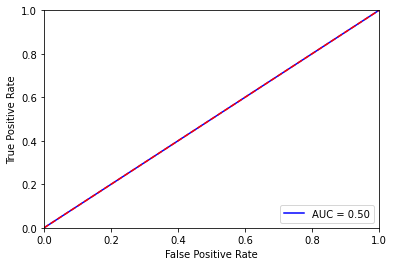

In [22]:
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [23]:
pred = []
for elem in y_pred2:
  pred.append(int(round(elem)))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))
fpr,tpr,thresh = roc_curve(y_test,pred)
roc_auc = auc(fpr,tpr)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      8603
           1       0.00      0.00      0.00       385

    accuracy                           0.96      8988
   macro avg       0.48      0.50      0.49      8988
weighted avg       0.92      0.96      0.94      8988

[[8603    0]
 [ 385    0]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


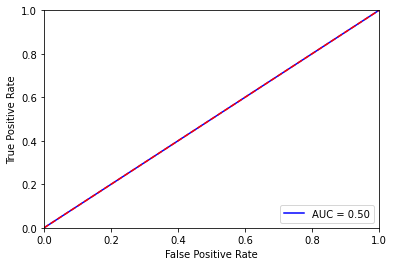

In [24]:
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [25]:
y_columns = "obscene"
y = train[y_columns]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=300)
x_train = x_train.reshape(-1,1)
LIN = LinearRegression()
LIN.fit(x_train, y_train)
x_test = x_test.reshape(-1,1)
y_pred = LIN.predict(x_train)
y_pred2 = LIN.predict(x_test)
print("Train MAE: ")
print(metrics.mean_absolute_error(y_train,y_pred))
print()
print("Test MAE: ")
print(metrics.mean_absolute_error(y_test,y_pred2))
print()
print("Test MSE: ")
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred2)))

Train MAE: 
0.3916301012672297

Test MAE: 
0.39280668411815073

Test MSE: 
0.4438529776433877


In [26]:
pred = []
for elem in y_pred:
  pred.append(int(round(elem)))
print(classification_report(y_train,pred))
print(confusion_matrix(y_train,pred))
fpr,tpr,thresh = roc_curve(y_train,pred)
roc_auc = auc(fpr,tpr)

              precision    recall  f1-score   support

           0       0.73      1.00      0.84     26253
           1       0.00      0.00      0.00      9695

    accuracy                           0.73     35948
   macro avg       0.37      0.50      0.42     35948
weighted avg       0.53      0.73      0.62     35948

[[26253     0]
 [ 9695     0]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


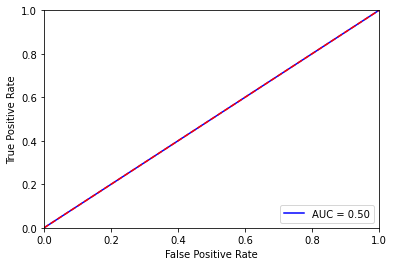

In [27]:
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [28]:
pred = []
for elem in y_pred2:
  pred.append(int(round(elem)))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))
fpr,tpr,thresh = roc_curve(y_test,pred)
roc_auc = auc(fpr,tpr)

              precision    recall  f1-score   support

           0       0.73      1.00      0.84      6543
           1       0.00      0.00      0.00      2445

    accuracy                           0.73      8988
   macro avg       0.36      0.50      0.42      8988
weighted avg       0.53      0.73      0.61      8988

[[6543    0]
 [2445    0]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


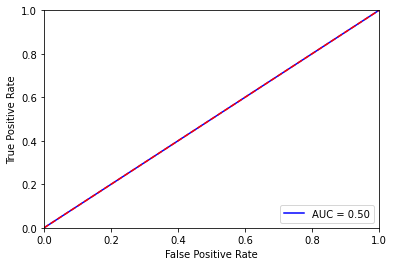

In [29]:
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [30]:
y_columns = "threat"
y = train[y_columns]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=300)
x_train = x_train.reshape(-1,1)
LIN = LinearRegression()
LIN.fit(x_train, y_train)
x_test = x_test.reshape(-1,1)
y_pred = LIN.predict(x_train)
y_pred2 = LIN.predict(x_test)
print("Train MAE: ")
print(metrics.mean_absolute_error(y_train,y_pred))
print()
print("Test MAE: ")
print(metrics.mean_absolute_error(y_test,y_pred2))
print()
print("Test MSE: ")
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred2)))

Train MAE: 
0.03163921063348258

Test MAE: 
0.028033176189439814

Test MSE: 
0.11052107312298556


In [31]:
pred = []
for elem in y_pred:
  pred.append(int(round(elem)))
print(classification_report(y_train,pred))
print(confusion_matrix(y_train,pred))
fpr,tpr,thresh = roc_curve(y_train,pred)
roc_auc = auc(fpr,tpr)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     35370
           1       0.00      0.00      0.00       578

    accuracy                           0.98     35948
   macro avg       0.49      0.50      0.50     35948
weighted avg       0.97      0.98      0.98     35948

[[35370     0]
 [  578     0]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


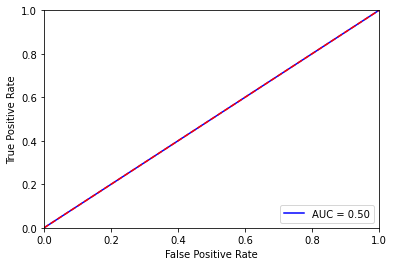

In [32]:
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [33]:
pred = []
for elem in y_pred2:
  pred.append(int(round(elem)))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))
fpr,tpr,thresh = roc_curve(y_test,pred)
roc_auc = auc(fpr,tpr)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      8877
           1       0.00      0.00      0.00       111

    accuracy                           0.99      8988
   macro avg       0.49      0.50      0.50      8988
weighted avg       0.98      0.99      0.98      8988

[[8877    0]
 [ 111    0]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


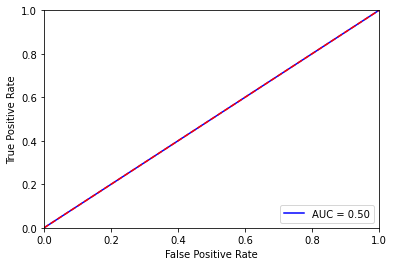

In [34]:
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [35]:
y_columns = "insult"
y = train[y_columns]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=300)
x_train = x_train.reshape(-1,1)
LIN = LinearRegression()
LIN.fit(x_train, y_train)
x_test = x_test.reshape(-1,1)
y_pred = LIN.predict(x_train)
y_pred2 = LIN.predict(x_test)
print("Train MAE: ")
print(metrics.mean_absolute_error(y_train,y_pred))
print()
print("Test MAE: ")
print(metrics.mean_absolute_error(y_test,y_pred2))
print()
print("Test MSE: ")
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred2)))

Train MAE: 
0.3735334808412247

Test MAE: 
0.3741772177094136

Test MSE: 
0.4329279619298365


In [36]:
pred = []
for elem in y_pred:
  pred.append(int(round(elem)))
print(classification_report(y_train,pred))
print(confusion_matrix(y_train,pred))
fpr,tpr,thresh = roc_curve(y_train,pred)
roc_auc = auc(fpr,tpr)

              precision    recall  f1-score   support

           0       0.75      1.00      0.86     26916
           1       0.00      0.00      0.00      9032

    accuracy                           0.75     35948
   macro avg       0.37      0.50      0.43     35948
weighted avg       0.56      0.75      0.64     35948

[[26916     0]
 [ 9032     0]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


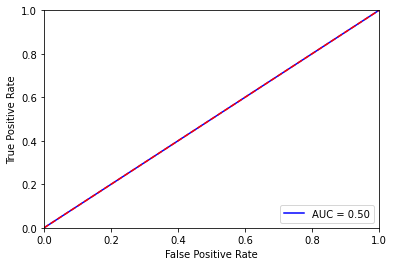

In [37]:
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [38]:
pred = []
for elem in y_pred2:
  pred.append(int(round(elem)))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))
fpr,tpr,thresh = roc_curve(y_test,pred)
roc_auc = auc(fpr,tpr)

              precision    recall  f1-score   support

           0       0.75      1.00      0.86      6716
           1       0.00      0.00      0.00      2272

    accuracy                           0.75      8988
   macro avg       0.37      0.50      0.43      8988
weighted avg       0.56      0.75      0.64      8988

[[6716    0]
 [2272    0]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


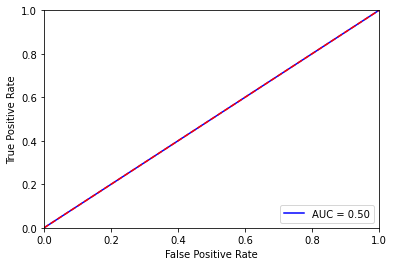

In [39]:
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [40]:
y_columns = "identity_hate"
y = train[y_columns]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=300)
x_train = x_train.reshape(-1,1)
LIN = LinearRegression()
LIN.fit(x_train, y_train)
x_test = x_test.reshape(-1,1)
y_pred = LIN.predict(x_train)
y_pred2 = LIN.predict(x_test)
print("Train MAE: ")
print(metrics.mean_absolute_error(y_train,y_pred))
print()
print("Test MAE: ")
print(metrics.mean_absolute_error(y_test,y_pred2))
print()
print("Test MSE: ")
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred2)))

Train MAE: 
0.09006536586278747

Test MAE: 
0.08911005389037088

Test MSE: 
0.20997025143549028


In [41]:
pred = []
for elem in y_pred:
  pred.append(int(round(elem)))
print(classification_report(y_train,pred))
print(confusion_matrix(y_train,pred))
fpr,tpr,thresh = roc_curve(y_train,pred)
roc_auc = auc(fpr,tpr)

              precision    recall  f1-score   support

           0       0.95      1.00      0.98     34247
           1       0.00      0.00      0.00      1701

    accuracy                           0.95     35948
   macro avg       0.48      0.50      0.49     35948
weighted avg       0.91      0.95      0.93     35948

[[34247     0]
 [ 1701     0]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


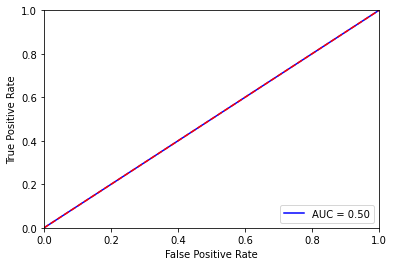

In [42]:
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [43]:
pred = []
for elem in y_pred2:
  pred.append(int(round(elem)))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))
fpr,tpr,thresh = roc_curve(y_test,pred)
roc_auc = auc(fpr,tpr)

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      8572
           1       0.00      0.00      0.00       416

    accuracy                           0.95      8988
   macro avg       0.48      0.50      0.49      8988
weighted avg       0.91      0.95      0.93      8988

[[8572    0]
 [ 416    0]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


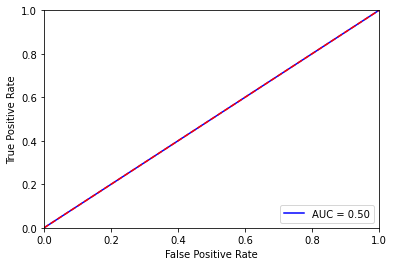

In [44]:
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [45]:
train

,Unnamed: 0,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,sum
0,43346,73b77bbc3fd5f2e6,listas Henke Brad William,0,0,0,0,0,0,0
1,30221,503848e8a9f376fa,Good job Its now much better referenced I move...,0,0,0,0,0,0,0
2,198074,999f2b6f546d0199,I swear I scoured the talk help pages for the ...,0,0,0,0,0,0,0
3,40765,6ccc5301a9e456da,Tax Document from Vector Marketing Hi 72Dino I...,0,0,0,0,0,0,0
4,147574,3ebba7ac63bb771e,Time to unprotect Banjo Paterson Its been thre...,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
44931,123780,9622c82f97eb26cd,She is a Motherfucker I will block you Motherf...,1,1,1,1,1,1,6
44932,29966,4f95394c7229f84c,u motherfukkin bitch i want to rape you smelly...,1,1,1,1,1,1,6
44933,38576,66f0a9006c188820,fuck you honkey why you hatin on blacks You fu...,1,1,1,1,1,1,6
44934,67240,b3e7b8a6ea14ddc5,YOURE A FRREAKING JEW AND PLEAZE COMMIT SUICIDE,1,1,1,1,1,1,6


In [ ]:
train['comment_text'] = cz
train

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,101456,0,0,0,0,0,0
1,000103f0d9cfb60f,96303,0,0,0,0,0,0
2,000113f07ec002fd,110961,0,0,0,0,0,0
3,0001b41b1c6bb37e,36656,0,0,0,0,0,0
4,0001d958c54c6e35,202984,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
223544,fff8f64043129fa2,136111,0,0,0,0,0,0
223545,fff9d70fe0722906,140114,0,0,0,0,0,0
223546,fffa8a11c4378854,216907,0,0,0,0,0,0
223547,fffac2a094c8e0e2,140258,1,0,1,0,1,0


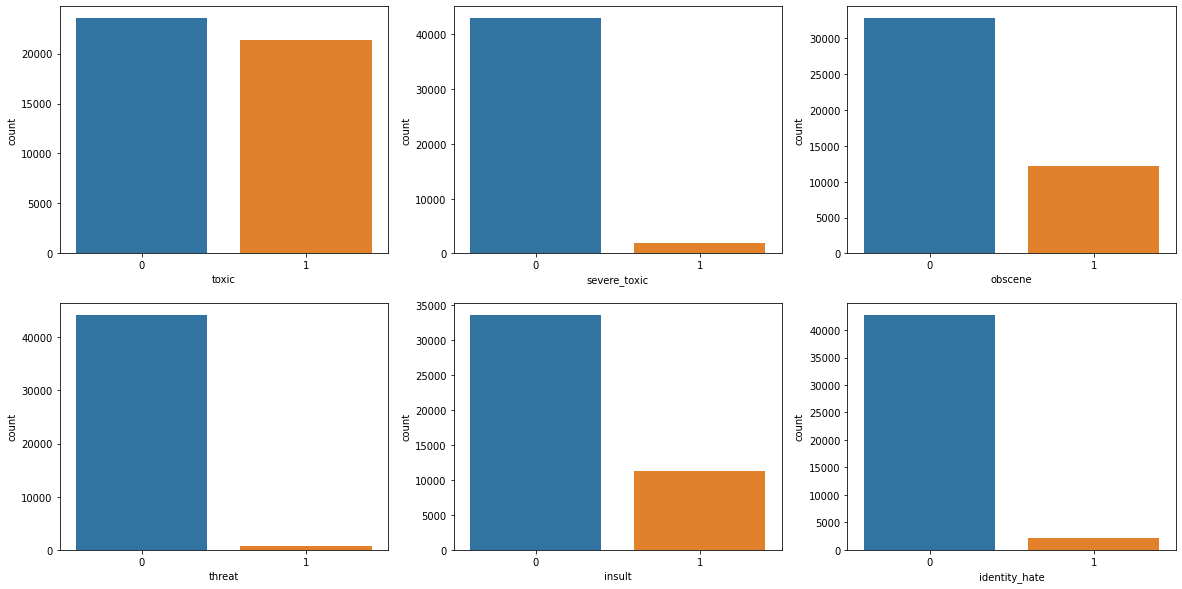

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axs = plt.subplots(2, 3, figsize=(20,10))
# sns.set(style="darkgrid")
sns.countplot(train['toxic'],ax=axs[0,0])
sns.countplot(train['severe_toxic'],ax=axs[0,1])
sns.countplot(train['obscene'],ax=axs[0,2])
sns.countplot(train['threat'], ax = axs[1,0])
sns.countplot(train['insult'], ax=axs[1,1])
sns.countplot(train['identity_hate'],  ax = axs[1,2])